In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [4]:
import mnist_keras

In [5]:
(x_train, y_train), (x_test, y_test) = mnist_keras.load_data()

In [5]:
import mnist_keras

model = mnist_keras.build_model()
# Testing the model using test Function from mnist_keras
model = mnist_keras.train(model, "model_amitej")

# Testing the model using test Function from mnist_keras
mnist_keras.test(model_name="model_amitej")

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2762 - accuracy: 0.9214
Epoch 2/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1247 - accuracy: 0.9628
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0870 - accuracy: 0.9733
Epoch 4/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0654 - accuracy: 0.9804
Epoch 5/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0511 - accuracy: 0.9847
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model_amitej\assets
10000/10000 [==============================] - 1s 70us/sample - loss: 0.0826 - accuracy: 0.9748
Test Loss: 0.08264520636110101, Test Accuracy: 0.9747999906539917


### Finding 12 unsuccessful predictions in the test set in random order 

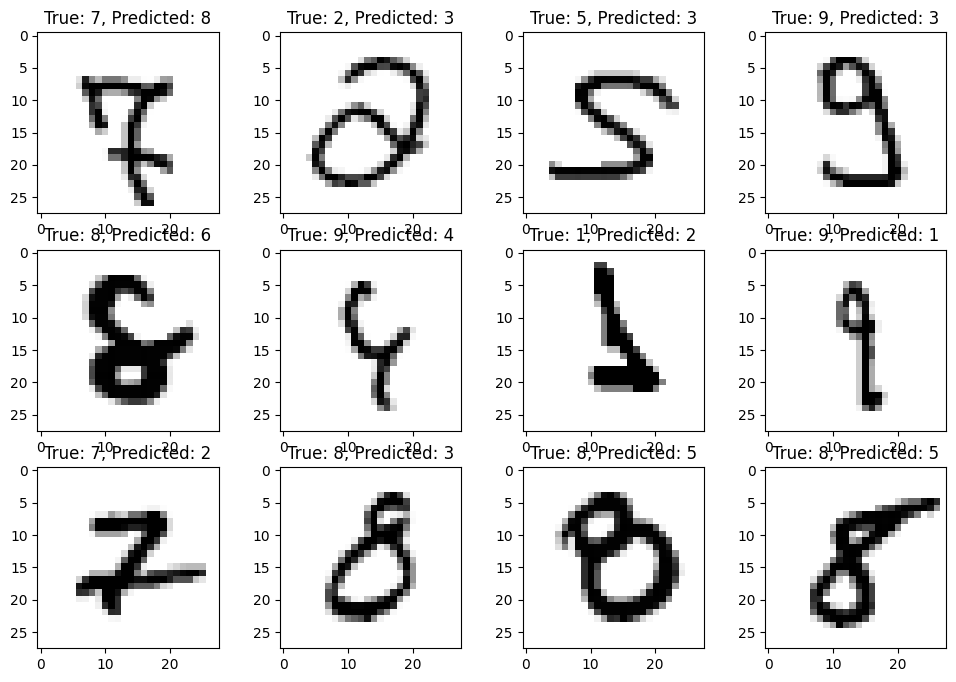

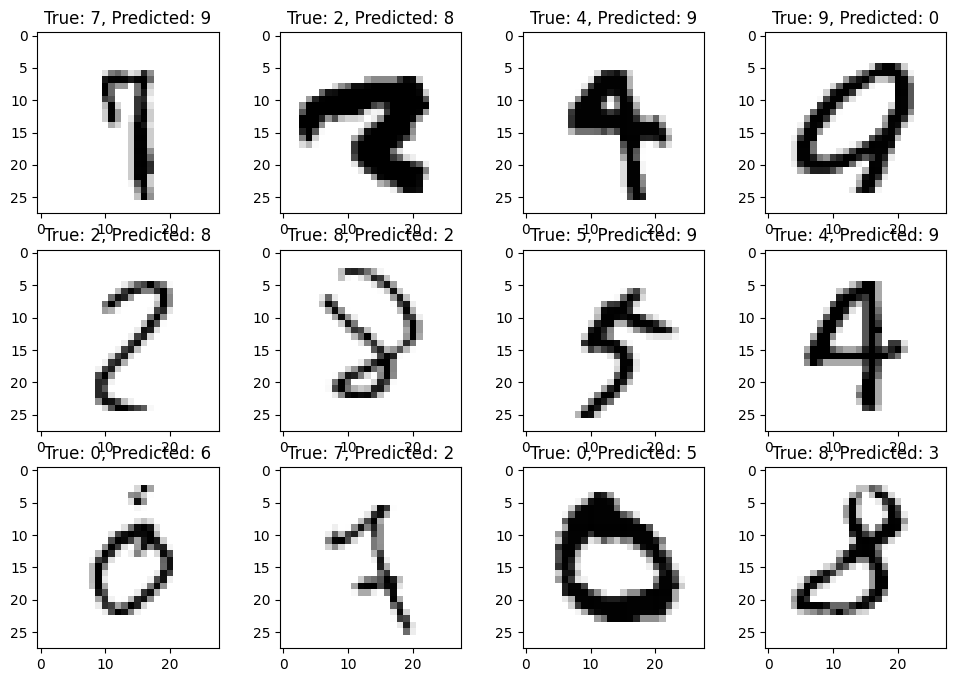

In [9]:
# we'll loop through all the images and end the loop when we get 12 unsucessfull_predicts, we will do this twice as Required

for i in range(2): #twice as Required 
        x_test, y_test = shuffle(x_test, y_test)
        unsuccessful_predictions = []
        for j in range(len(x_test)):
            prediction = mnist_keras.predict(x_test[j], model_name='model_amitej')
            if prediction != y_test[j]:
                unsuccessful_predictions.append((x_test[j], y_test[j], prediction))
                if len(unsuccessful_predictions) == 12:
                    break

        plt.figure(figsize=(12, 8))
        for idx, (x, true_label, predicted_label) in enumerate(unsuccessful_predictions):
            plt.subplot(3, 4, idx + 1)
            plt.imshow(x.reshape(28, 28), cmap=plt.cm.binary)
            plt.title(f'True: {true_label}, Predicted: {predicted_label}')
        plt.show()   
    

### Showing Train.py

In [10]:
import mnist_keras

(x_train, y_train), (_, _) = mnist_keras.load_data()
model = mnist_keras.build_model()
model.fit(x_train, y_train, epochs=5)
model.save('model_amitej')

#accuracy and loss is Shown

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2696 - accuracy: 0.9232
Epoch 2/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1204 - accuracy: 0.9646
Epoch 3/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0829 - accuracy: 0.9754
Epoch 4/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0635 - accuracy: 0.9805
Epoch 5/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0494 - accuracy: 0.9844
INFO:tensorflow:Assets written to: model_amitej\assets


### Showing Test.py

In [11]:
import mnist_keras

(x_train, y_train), (_, _) = mnist_keras.load_data()
model = mnist_keras.load(model_name='model_amitej')
mnist_keras.test(model_name='model_amitej')

#accuracy and loss is Shown

10000/10000 [==============================] - 1s 70us/sample - loss: 0.0841 - accuracy: 0.9737
Test Loss: 0.08411657531410456, Test Accuracy: 0.9736999869346619


## Testing model accuracy on Hand-written Digits

In [12]:
import sys
import glob
from PIL import Image
import numpy as np
import mnist_keras
import random
import matplotlib.pyplot as plt

image_size = 28*28

image_pattern = "*.png"
files = glob.glob(image_pattern)  

# we select the sample of 10 images instead of all. This random selection produces different images everytime we run.
image_files = random.sample(files, 10)

for i in image_files:
    true_label = int(i[0])
    test_images = Image.open(i).convert('L')
    images0 = np.array(test_images)
    images0 = images0.reshape(-1, image_size)
    prediction = mnist_keras.predict(images0, model_name='model_amitej')

    print("predicted:", prediction, "true_label:",true_label)

predicted: 0 true_label: 0
predicted: 7 true_label: 7
predicted: 7 true_label: 7
predicted: 9 true_label: 9
predicted: 5 true_label: 5
predicted: 9 true_label: 9
predicted: 6 true_label: 6
predicted: 8 true_label: 8
predicted: 4 true_label: 4
predicted: 9 true_label: 9


In [ ]:
tensorflow.